# <font color='green'><b> Spatial Filtering </b></font>


### Credits: Hands-on Image Processing with Python, Chapter 2 & 4 - Author: Sandipan Dey


**Image Smoothing**

*Goal*

Learn to:
- Blur images with various low pass filters
- Apply custom-made filters to images (2D convolution)

**Image Sharpening**



## <font color='green'><b>Import libraries</b></font>

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import plotly.express as px
from plotly.subplots import make_subplots       
import math
from skimage.io import imread


img_dir = '../Immagini_IN/'
out_dir = '../Immagini_OUT/'

## <font color='green'><b>Load an Image</b></font>


### In line

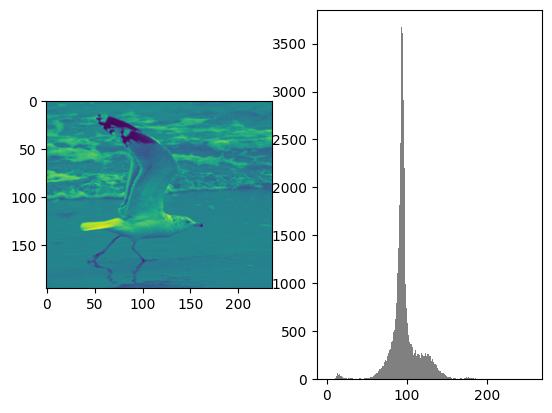

In [15]:
# 0. import the functions you need that are not already imported
import skimage

#1. load the image 'gabbiano.jpg' (using the skimage library)
im = skimage.io.imread(img_dir + "gabbiano.jpg")



#plt.imshow(im)
 
#2. plot the img in a figure with 3 row and 2 columns
res1 = cv2.resize(im, None, fx=3, fy=2, interpolation = cv2.INTER_CUBIC)
#plt.imshow(res1)
 
#3. convert to gray scale 
gray = skimage.img_as_ubyte(skimage.color.rgb2gray(im))
plt.subplot(121), plt.imshow(gray)
#plt.imshow(gray)

#4. compute the histogram of the gray scale image

#5. plot the histogram of the gray scale image
plt.subplot(122)
plt.hist(gray.ravel(), bins=256, range=(0, 256), color='gray')
 
 

#6. Apply the contrast stretching to the rgb image using the rescale_intensity (skimage library)
# Set the limits of the contrast stretching to 5 and 95 respectively
#stretched = skimage.exposure.rescale_intensity(im, 9, 95)
#plt.subplot(123), plt.imshow(stretched)

#7. plot the RGB histogram of the contrasted image 
 
#8. equalize the image with the CLAHE method
 
#9. plot the histogram of the equalized image
plt.show()

In [16]:
from skimage.color import rgb2gray
from skimage import img_as_float,img_as_ubyte, exposure

#read another image:
 
img = imread(img_dir + 'bebe.jpg')
gray = img_as_ubyte(rgb2gray(img))
Height, Width, Channels = img.shape
print(Height, Width, Channels)

185 276 3


In [17]:
def multiPlots(images, titles= [], nCols = 2):

  '''multiPlots funtion allows to plot a list of images organized on nCols, with possible titles'''

  nImg =len(images)
  nRows = math.ceil(nImg/nCols) 
  f = plt.figure(figsize=(15,5*nRows))

  for n, image in enumerate(images): 
    row = int(n/nCols)+1
    col = n%nCols+1
    ax = f.add_subplot(nRows, nCols, n+1)
    ax.imshow(image)   
    plt.axis('off')
    if titles:
      plt.title(titles[n]) 

## <font color='green'><b>Smoothing with 2D Convolution</b></font>

### <font color='green'><b>Smoothing with *Opencv* </b></font>

The filtering function of Opencv works both on color and gray images


##### <font color='green'><b> **1.   Draw your kernel** </b></font>  

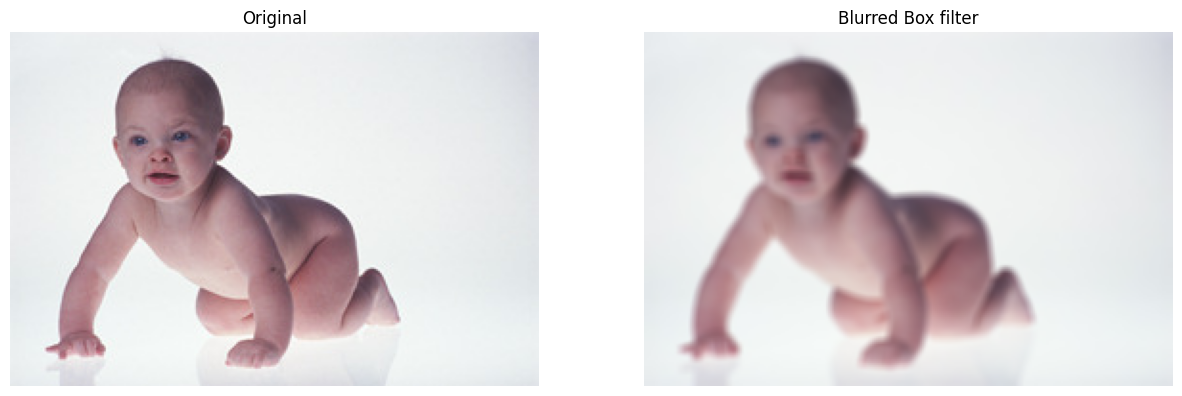

In [18]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel) #https://www.tutorialspoint.com/opencv/opencv_filter2d.htm
# the parameter "-1" means that we want "dst" maintains the data type of img.
images = []
images.append(img)
images.append(dst)
 
titles = ['Original', 'Blurred Box filter']
multiPlots(images, titles)

##### <font color='green'><b>EXERCISE 1: </b></font>
 
- Draw a smoothing kernel 3x3 s.t. 

$K = \frac{1}{n} \left[ \begin{matrix}
1 & 2 & 1 \\
2 & 3 & 2 \\
1 & 2 & 1 \\
\end{matrix} \right] $


fixing opportunely $n$.  

- Apply it on the gray image and compare it with the box filter of the same size. 
- Which one behaves better?

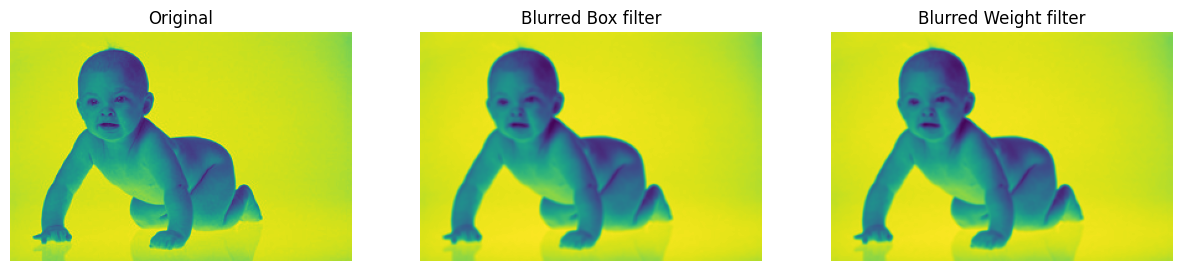

In [19]:
#TO DO 
img = rgb2gray(img)
kernel = np.ones((3,3), np.float32) / 9
#1.draw the required kernel
kernelPesato =np.array([[1,2,1], [2,3,2], [1,2,1]], np.float32)
kernelPesato = kernelPesato / np.sum(kernelPesato)
#2. apply the produced kernel to "img"
blur = cv2.filter2D(img, -1, kernel)
blurPesato = cv2.filter2D(img, -1, kernelPesato)
 
# 3. [GIVEN] show with the function multiplots:
# - the orignal image,
# - the one filtered with the box filter
# - the one filtered with the weight filter
images = []
images.append(img)
images.append(blur) #change with the name of your box filtered image
images.append(blurPesato)#change with the name of your weighted filtered image

titles = ['Original', 'Blurred Box filter', 'Blurred Weight filter']
multiPlots(images, titles, 3)


##### <font color='green'><b> **2. Box Filtering**</b></font>  

 

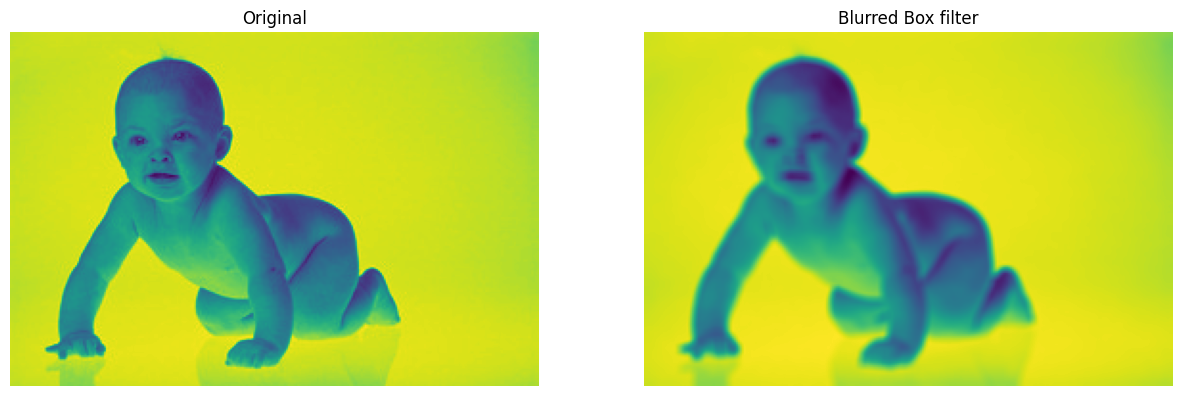

In [20]:
blur = cv2.blur(img,(5,5))

#Visualization
images = []
images.append(img)
images.append(blur)
 
titles = ['Original', 'Blurred Box filter']
multiPlots(images, titles)


##### <font color='green'><b> **3. Gaussian Filtering**</b></font>  

If you want, you can create a Gaussian kernel with the function, `cv2.getGaussianKernel()`, then you can use the `cv2.filter2D()` function, otherwise use `cv2.GaussianBlur()`
 


- function to plot Gaussian filter

In [21]:
def gaussPlot(winSize, sigmaVal):
  x, y = np.mgrid[-1*winSize:winSize:30j, -1*winSize:winSize:30j]

  # Need an (N, 2) array of (x, y) pairs.
  xy = np.column_stack([x.flat, y.flat])

  mu = np.array([0.0, 0.0])
  sigma = np.array([sigmaVal, sigmaVal])
  covariance = np.diag(sigma**2)

  z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

  # Reshape back to a (30, 30) grid.
  z = z.reshape(x.shape)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x,y,z)
  #ax.plot_wireframe(x,y,z)
  plt.show()

- Gaussian filter definition and application

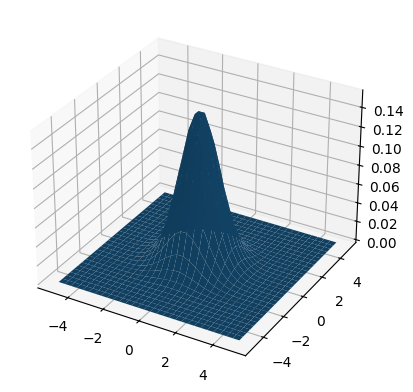

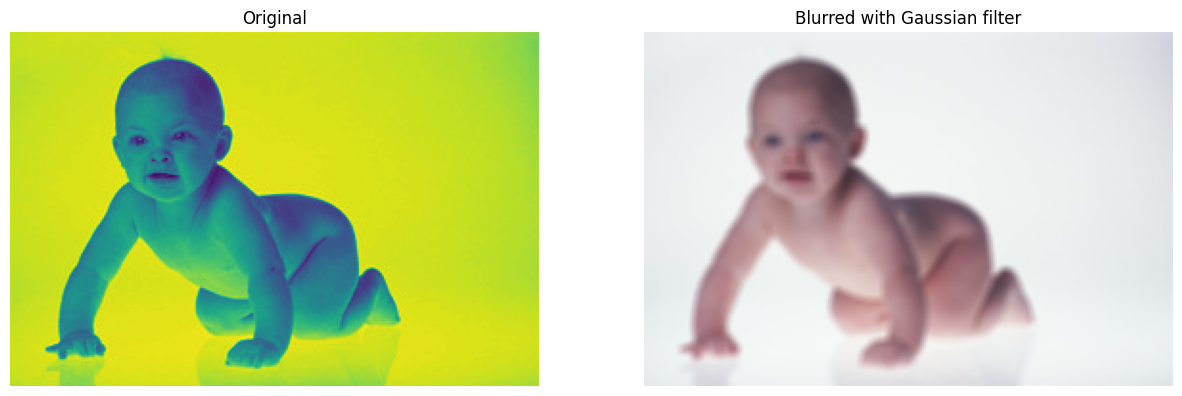

In [22]:
sigmaVal = 1.0
winSize = np.uint8(np.round(sigmaVal*3))+1
if winSize % 2 == 0: #check: size must be odd
  winSize = winSize +1

gaussPlot(winSize, sigmaVal)
blur = cv2.GaussianBlur(img,(winSize,winSize), sigmaVal)

#Visualization
images = []
images.append(img)
images.append(dst)
 
titles = ['Original', 'Blurred with Gaussian filter']
multiPlots(images, titles)
 

##### <font color='green'><b>-  EXERCISE 2: </b></font>

Compare the blurring with box filtering and with gaussian filters incrementing the side of the box filtering (e.g. 5,9,11) and the sigma (e.g. 1,3,5). Which one introduces more aberrations?

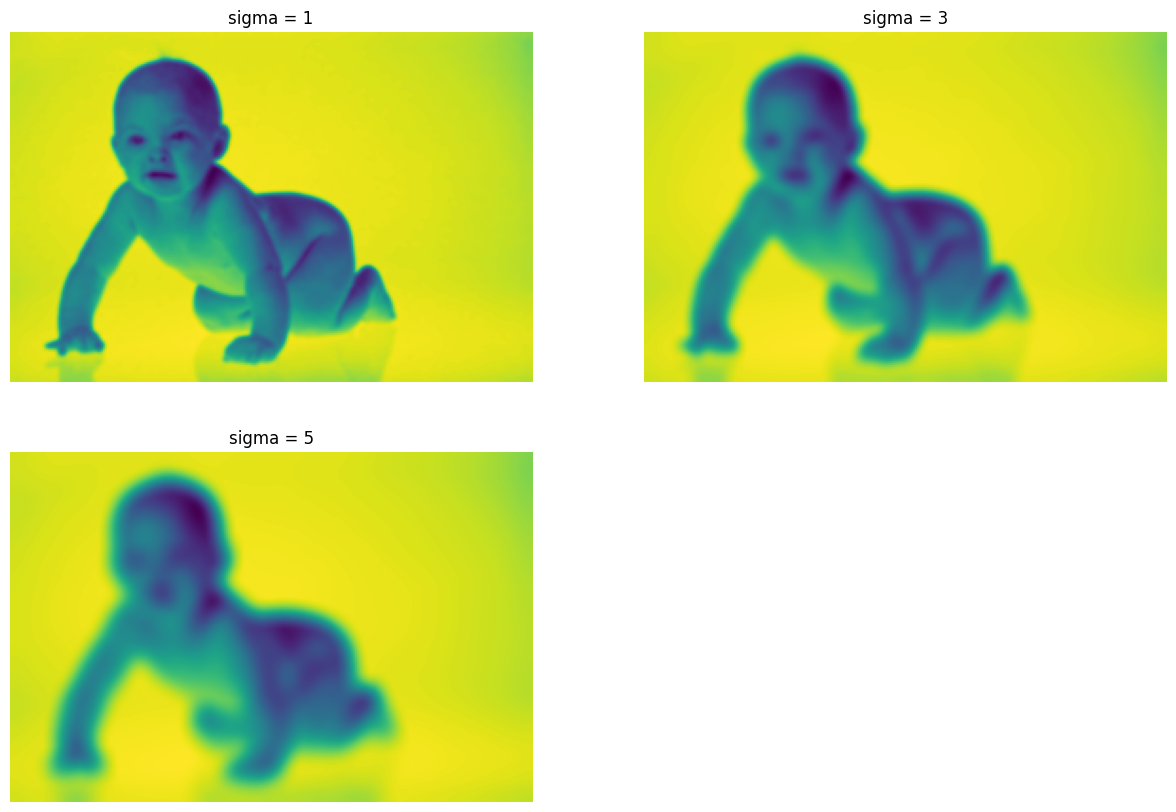

In [23]:
#TO DO

#1. Compute and plot the images filtered with a box filter of side 5,9,11
blur5 = cv2.blur(img,(5,5))
blur9 = cv2.blur(img,(9,9))
blur11 = cv2.blur(img,(11,11))

boxImages = []
boxImages.append(blur5)
boxImages.append(blur9)
boxImages.append(blur11)

boxTitles = (["Blur 5x5"] , ["Blur 9x9"], ["Blur 11x11"])

#multiPlots(boxImages, boxTitles)

#2. Compute and plot the images filtered with a Gaussia filter with sigma 1,3,5


sigmaVal = 1.0
winSize = np.uint8(np.round(sigmaVal*3))+1
if winSize % 2 == 0: #check: size must be odd
  winSize = winSize +1

gaus1 = cv2.GaussianBlur(img,(winSize,winSize), sigmaVal)



sigmaVal = 3.0
winSize = np.uint8(np.round(sigmaVal*3))+1
if winSize % 2 == 0: #check: size must be odd
  winSize = winSize +1

gaus3 = cv2.GaussianBlur(img,(winSize,winSize), sigmaVal)


sigmaVal = 5.0
winSize = np.uint8(np.round(sigmaVal*3))+1
if winSize % 2 == 0: #check: size must be odd
  winSize = winSize +1

gaus5 = cv2.GaussianBlur(img,(winSize,winSize), sigmaVal)

gausImages = []
gausImages.append(gaus1)
gausImages.append(gaus3)
gausImages.append(gaus5)
 
gausTitles = ("sigma = 1", "sigma = 3", "sigma = 5")

multiPlots(gausImages, gausTitles)

### <font color='gray'><b>Smoothing with *Scipy*  </b></font>


#### For gray scale images
 

- use the function `signal.convolve2d()` or, specifically for gaussian filter, `gaussian_filter()`

(256, 256) <class 'numpy.ndarray'> float64 0.9921568627450982


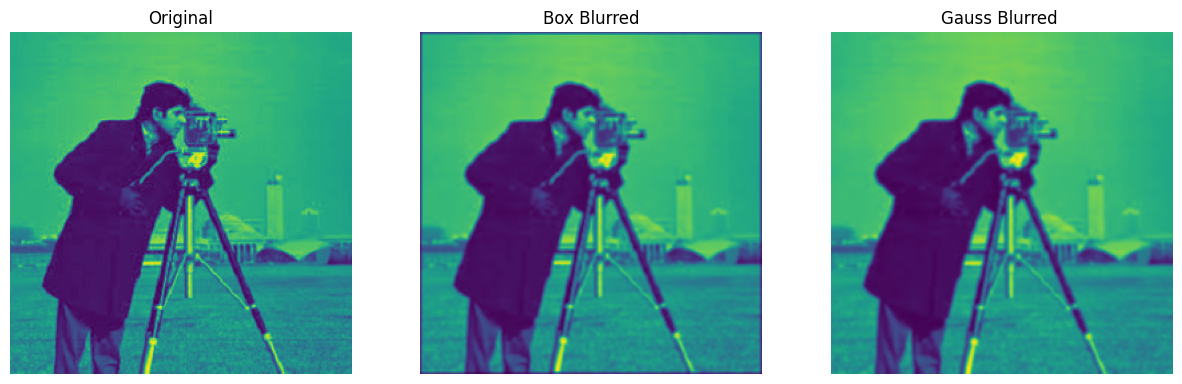

In [24]:
from scipy import ndimage, misc, signal 
from scipy.ndimage import gaussian_filter

im = rgb2gray(imread(img_dir + 'cameraman.jpg')) 
print(im.shape, type(im), im.dtype, np.max(im))

blur_box_kernel = np.ones((3,3)) / 9

im_blurredBox = signal.convolve2d(im, blur_box_kernel)
im_blurredGauss = gaussian_filter(im, sigma=1)


#Visualization
images = []
images.append(im)
images.append(im_blurredBox)
images.append(im_blurredGauss)

 
titles = ['Original', 'Box Blurred', 'Gauss Blurred ']
multiPlots(images, titles, 3)


#### For color images

- use  `signal.convolve2d()` again
or, easier:

- `ndimage.convolve()` 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html


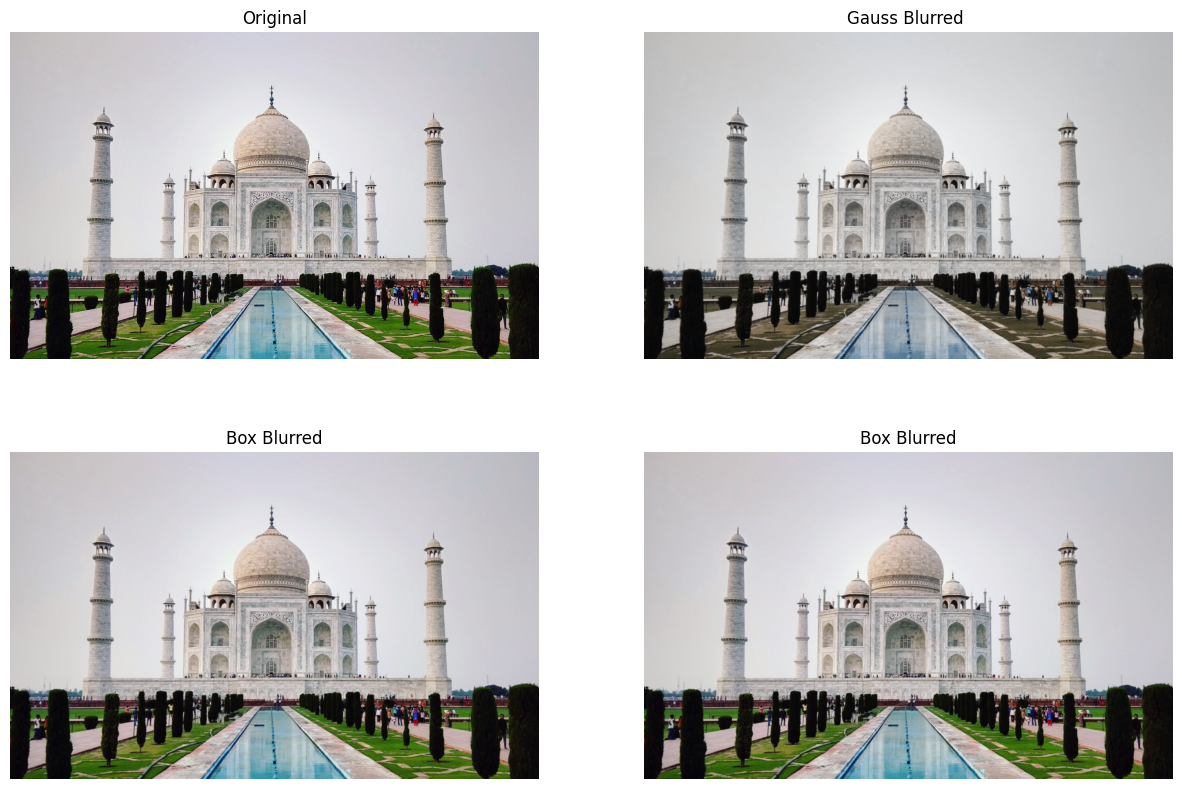

In [25]:
from skimage import img_as_float, img_as_ubyte

im = img_as_float(imread(img_dir + 'tajmahal.jpg')) 
#print(im.dtype, np.max(im), im.shape)

im_blurredGauss = gaussian_filter(im, sigma=1)

blur_box_kernel = np.ones((3,3)) /9
im_blurredBox = np.ones(im.shape) 


for i in range(3):
  im_blurredBox[...,i] = signal.convolve2d(im[...,i], blur_box_kernel, mode='same', boundary="symm")


blur_kernel = blur_box_kernel.reshape((3, 3, 1)) ##NB: must be 3x3x1 NOT 3x3 
im_blurredBox2 = np.clip(ndimage.convolve(im, blur_kernel, mode='nearest'), 0,1)


#Visualization
images = []
images.append(im)
images.append(im_blurredGauss)
images.append(im_blurredBox)
images.append(im_blurredBox2)


titles = ['Original', 'Gauss Blurred ', 'Box Blurred', 'Box Blurred']
multiPlots(images, titles, )
 

### <font color='gray'><b>Smoothing with *Skimage* </b></font>


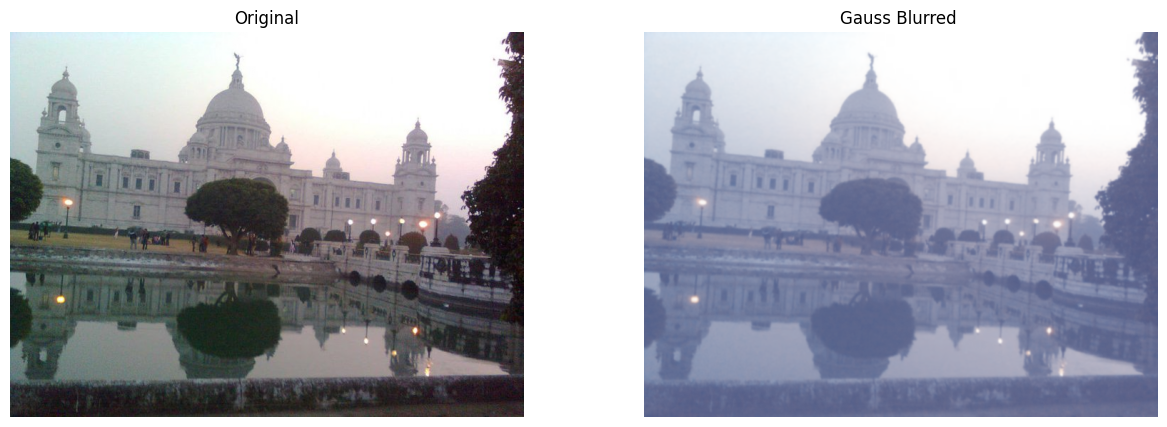

In [26]:
from skimage import img_as_float, img_as_ubyte
from skimage.filters import gaussian

im = img_as_float(imread(img_dir + 'victoria_memorial.png'))  
#print(im.dtype, np.max(im)) 

gauss_blurred = np.clip(gaussian(im, sigma= 1), 0,1)


#Visualization
images = []
images.append(im)
 
images.append(gauss_blurred)

titles = ['Original', 'Gauss Blurred ']
multiPlots(images, titles, 2)
 

## <font color='green'><b>Bilateral Filtering</b></font>
 
 



https://www.geeksforgeeks.org/python-bilateral-filtering/

As we noted, the filters we presented earlier tend to blur edges. This is not the case for the bilateral filter, cv2.bilateralFilter(), which was defined for, and is highly effective at noise removal while preserving edges. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.

The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

The sample below demonstrates the use of bilateral filtering (For details on arguments, see the OpenCV docs).



- d: Diameter of each pixel neighborhood.
- sigmaColor: Value of $\sigma$ in the color space. The greater the value, the colors farther to each other will start to get mixed.
- sigmaSpace: Value of $\sigma$ in the coordinate space. The greater its value, the more further pixels will mix together, given that their colors lie within the sigmaColor range.

Details about the bilateral filtering can be found [here](http://people.csail.mit.edu/sparis/bf_course/)

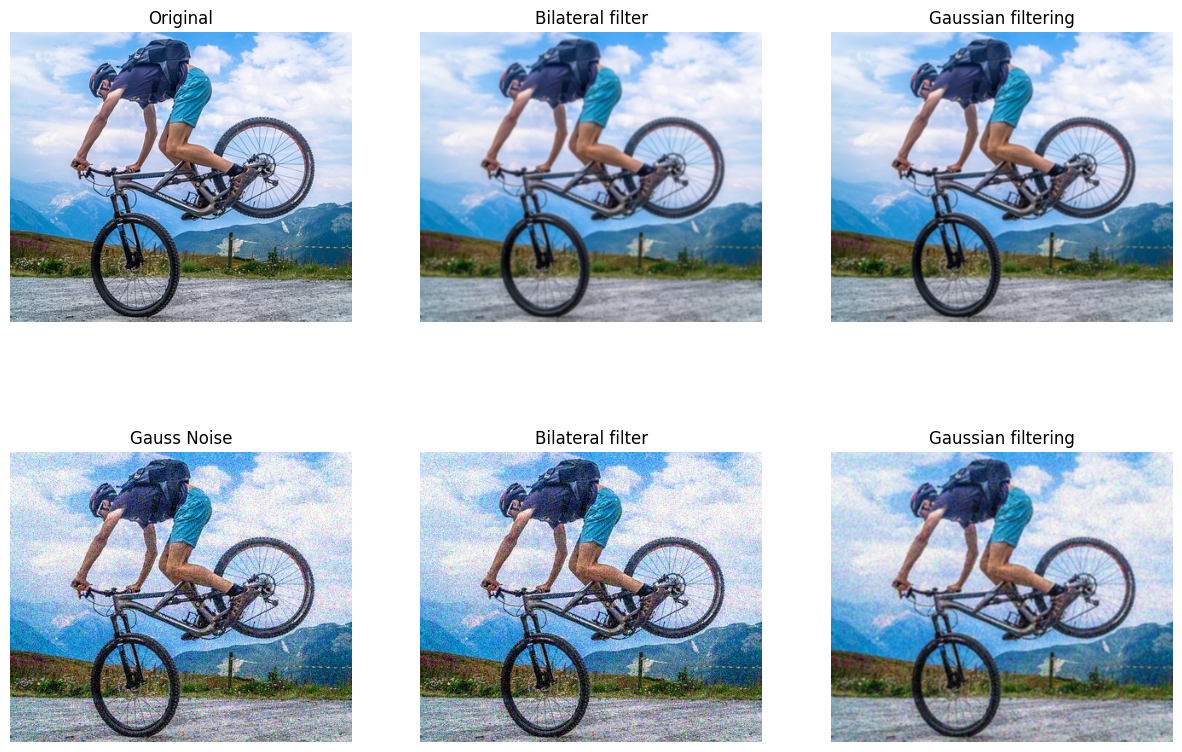

In [27]:
from skimage import img_as_float32
from skimage.restoration import denoise_bilateral
from skimage.util import random_noise 

img = img_as_float32(imread(img_dir + 'cycle.jpg'))
sigma = 0.1
 
#Add noise to an image
noisyGauss = np.uint8(random_noise(img, mode='gaussian', var=sigma**2)*255)  

# - Bilateral filtering opencv (RECOMMENDED)
bilateral_Img = cv2.bilateralFilter(img,d=6,sigmaColor=5, sigmaSpace=1) 
bilateral_Gauss = cv2.bilateralFilter(noisyGauss,6,5,1) #we can omit the parameter name, and put juts the value in the expected order

#- Bilateral filtering skimage (TOO SLOW! with different scale range for the parameters)
#bilateral_Img = denoise_bilateral(img, sigma_color=0.1, sigma_spatial=15, multichannel=True)                
#bilateral_Gauss = denoise_bilateral(noisyGauss, sigma_color=0.1, sigma_spatial=20, multichannel=True)  
 
# - Gaussian filtering
img_blurred = cv2.GaussianBlur(img,(3,3), 1)
gauss_blurred = cv2.GaussianBlur(noisyGauss,(3,3), 1)

# - Visualization
images = []
images.append(img)
images.append(bilateral_Img)
images.append(img_blurred)
images.append(noisyGauss)
images.append(bilateral_Gauss)
images.append(gauss_blurred)

titles = ['Original', 'Bilateral filter', 'Gaussian filtering', 'Gauss Noise', 'Bilateral filter', 'Gaussian filtering',]
multiPlots(images, titles,3)
 


## <font color='green'><b>Median Filtering</b></font>


### <font color='green'><b>Median Filtering using *Opencv*</b></font>



Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.

In this demo, we add a 50% noise to our original image and use a median filter. Check the result:

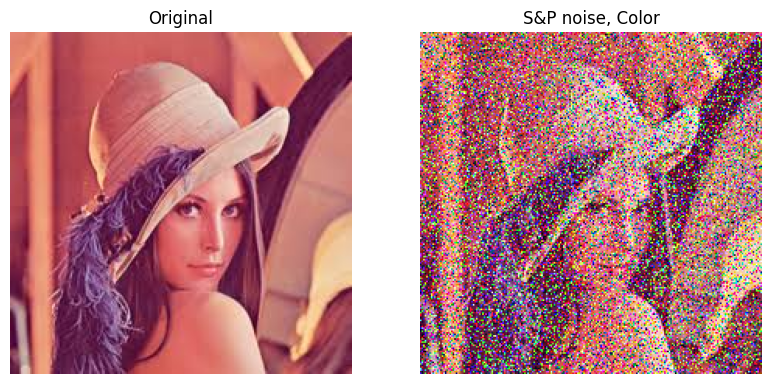

In [28]:
from skimage import img_as_float, img_as_ubyte

orig = imread(img_dir + 'lena.jpg')
noisy = np.copy(orig)

# add salt-and-pepper noise to the input image
noise = np.random.random(orig.shape)
noisy[noise > 0.85] = 255
noisy[noise < 0.15] = 0
 

#Visualization
images = []
images.append(orig)
images.append(noisy)
  
titles = ['Original', 'S&P noise, Color']
multiPlots(images, titles, 3)

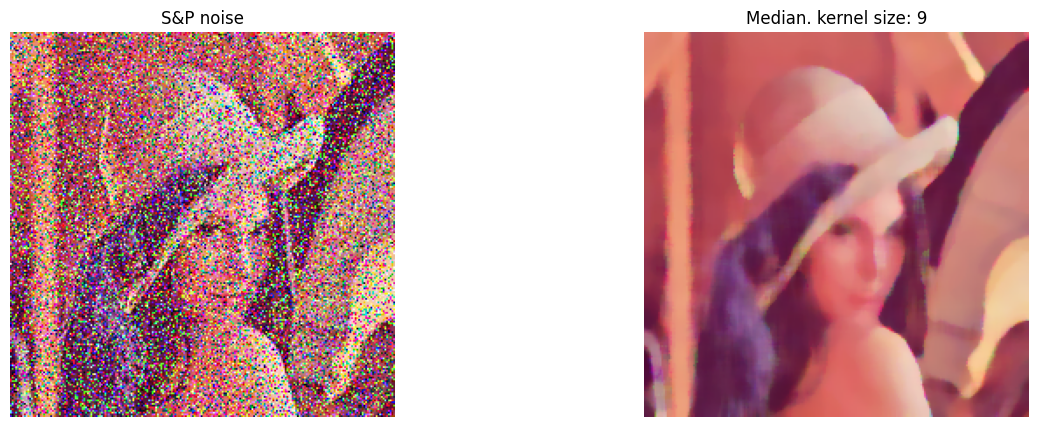

In [29]:
kernelSize= 9
median = cv2.medianBlur(noisy, kernelSize)

#Visualization
images = []
images.append(noisy) 
images.append(median) 
titles = ['S&P noise', 'Median. kernel size: '+ str(kernelSize)]
multiPlots(images, titles)
 

### <font color='gray'><b>Median Filtering using *Scipy*, a generalization </b></font>


- *Scipy* has the function `ndimage.precentile_filter()` that is a generalization of the median filter. 

  - The median filter is obtained setting the parameter `percentile=50`
  - changing it we obtain other rank filters (e.g. min , max)


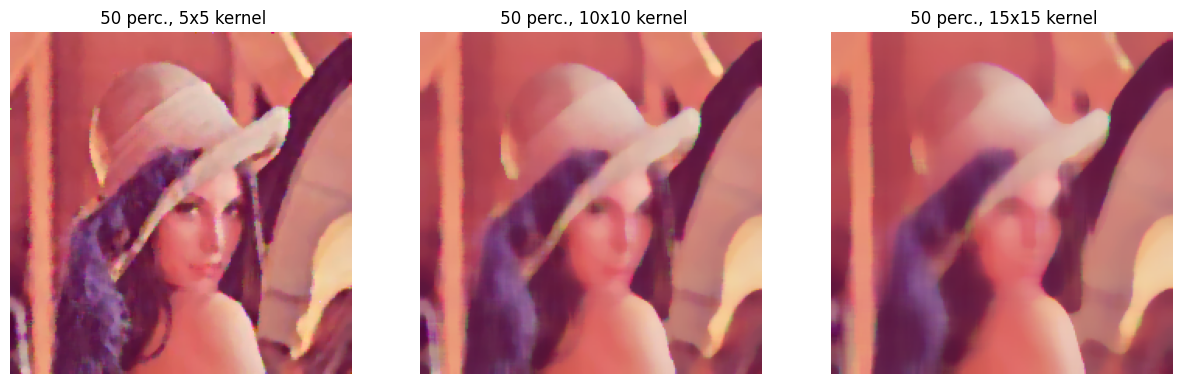

In [30]:
from scipy import ndimage, misc, signal 

images = []
titles = []

for i, k in enumerate(range(5,20,5)):
  filtered = ndimage.percentile_filter(noisy, percentile=50, size=(k,k,1))
  images.append(filtered) 
  titles.append(' 50 perc., ' + str(k) + 'x' + str(k) + ' kernel') 
 
multiPlots(images, titles, 3)

### <font color='gray'><b>Median Filtering using *Skimage*</b></font>

In [31]:
from skimage.filters import median
from skimage.morphology import disk

kernelSize = 3 
med = median(noisy_gray, disk(kernelSize))

#Visualization
images = []
images.append(noisy_gray) 
images.append(med) 
titles = ['S&P noise, Gray', 'Median. kernel size: '+ str(kernelSize)]
multiPlots(images, titles)
 

NameError: name 'noisy_gray' is not defined

#### <font color='green'><b>-  EXERCISE 3: </b></font>
   
- given the images with gaussian noise created above (`noisyGauss`), compare the effect of blurring via Gaussian, median and bilateral filters.

- Do the same on the image with SP noise `noisySP`.
Which filter works better in the two cases?

In [ ]:
#TO DO
#ADD NOISE to an image
perc_SP_noise = 0.1
noisySP = np.uint8(random_noise(img, mode='s&p', amount = perc_SP_noise)*255)

#TO DO

gauss_G = cv2.GaussianBlur(noisyGauss,(3,3), 1)
bilateral_Gauss = cv2.bilateralFilter(noisyGauss,6,5,1)  
med_G = cv2.medianBlur(noisyGauss, 5)
 
gauss_SP = cv2.GaussianBlur(noisySP,(3,3), 1)
med_SP = cv2.medianBlur(noisySP, 5)
bilateral_SP = cv2.bilateralFilter(noisyGauss,6,5,1)

#Visualization
images = []
images.append(noisyGauss) 
images.append(bilateral_Gauss)
images.append(gauss_G) 
images.append(med_G)

images.append(noisySP) 
images.append(bilateral_SP)
images.append(gauss_SP) 
images.append(med_SP)

titles = ['Gaussian Noise', 'Bilateral filter', 'Gaussian filter', 'Median filter',
          'SP Noise', 'Bilateral filter', 'Gaussian filter', 'Median filter']
multiPlots(images, titles)
 
 

NameError: name 'random_noise' is not defined

## <font color='green'><b>Sharpen filter with 2D Convolution</b></font>


### <font color='green'><b>Sharpen filter with *Opencv*</b></font>


##### **1. Draw your kernel**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


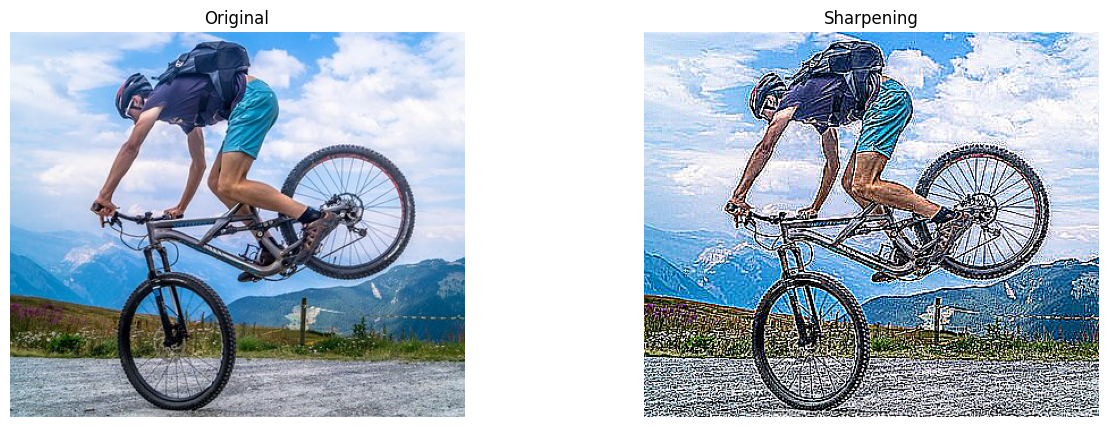

In [34]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]],np.float32)
dst = cv2.filter2D(img,-1,kernel) #https://www.tutorialspoint.com/opencv/opencv_filter2d.htm


#Visualization
images = []
images.append(img) 
images.append(dst) 

titles = ['Original', 'Sharpening']
multiPlots(images, titles)
 

#### <font color='green'><b>EXERCISE 4 </b></font>
 

Define a function `highBoost(img, a)` that given an image and the value `a`, apply the high boost filtering and return the filtered image

In [42]:
#TO DO
def highBoost(img, a):

  #1. define the central value
  central = 9 * a - 1
 
  #2.define the normalization factor
  norm = -1*8 + central
  #3. draw the kernel
  kernel = (1 / max(1,norm) * np.array([[-1,-1,-1], [-1, central, -1], [-1, -1, -1]],np.float32))
  #4. apply the kernel to "img"
  sharp = cv2.filter2D(img, -1, kernel)
  #5.return the filtered image
  return sharp


In [43]:
a= 1.5
out= highBoost(img, a)

#Visualization
images = []
images.append(img) 
images.append(out) 
titles = ['Original', 'HighBoost with parameter a:' + str(a)]
multiPlots(images, titles) 

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'filter2D'
> Overload resolution failed:
>  - kernel is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'kernel'


### <font color='gray'><b>Sharpen filter with *scipy*</b></font>

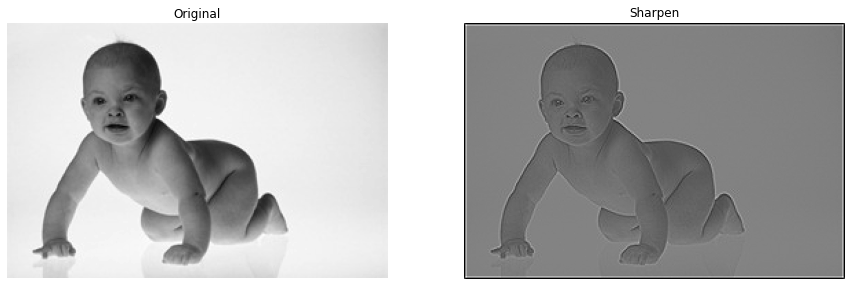

In [ ]:
sharp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
im_sharp =  signal.convolve2d(grayImg, sharp_kernel)
im_sharp = im_sharp / np.max(im_sharp)

#Visualization
images = []
images.append(grayImg) 
images.append(im_sharp) 
titles = ['Original', 'Sharpen']
multiPlots(images, titles) 
 

### <font color='gray'><b>Sharpen filter with *skimage*</b></font>

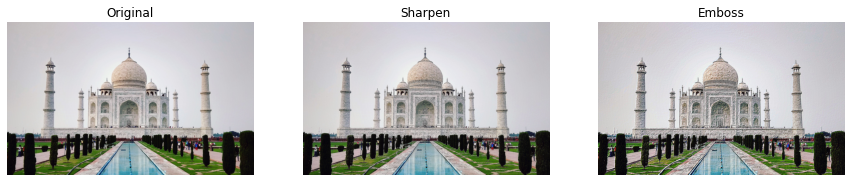

In [ ]:
im = img_as_float(imread(img_dir + 'tajmahal.jpg')) 

sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]).reshape((3, 3, 1))
im_sharpen = np.clip(ndimage.convolve(im, sharpen_kernel, mode='nearest'), 0,1)

emboss_kernel = np.array(np.array([[-2,-1,0],[-1,1,1],[0,1,2]])).reshape((3, 3, 1))
im_emboss = np.clip(ndimage.convolve(im, emboss_kernel, mode='nearest'), 0,1)

#Visualization
images = []
images.append(im) 
images.append(im_sharpen) 
images.append(im_emboss) 
titles = ['Original', 'Sharpen', 'Emboss']
multiPlots(images, titles, 3) 
 
